<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
penguim = sns.load_dataset('penguins')

In [3]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguim.shape

(344, 7)

In [5]:
# Traduzindo as colunas
penguim.columns = ["especies", "ilha", "comprimento_bico_mm", "profundidade_bico_mm",
                   "comprimento_nadadeira_mm", "massa_corporal_g", "sexo"]
penguim.head()

,especies,ilha,comprimento_bico_mm,profundidade_bico_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data

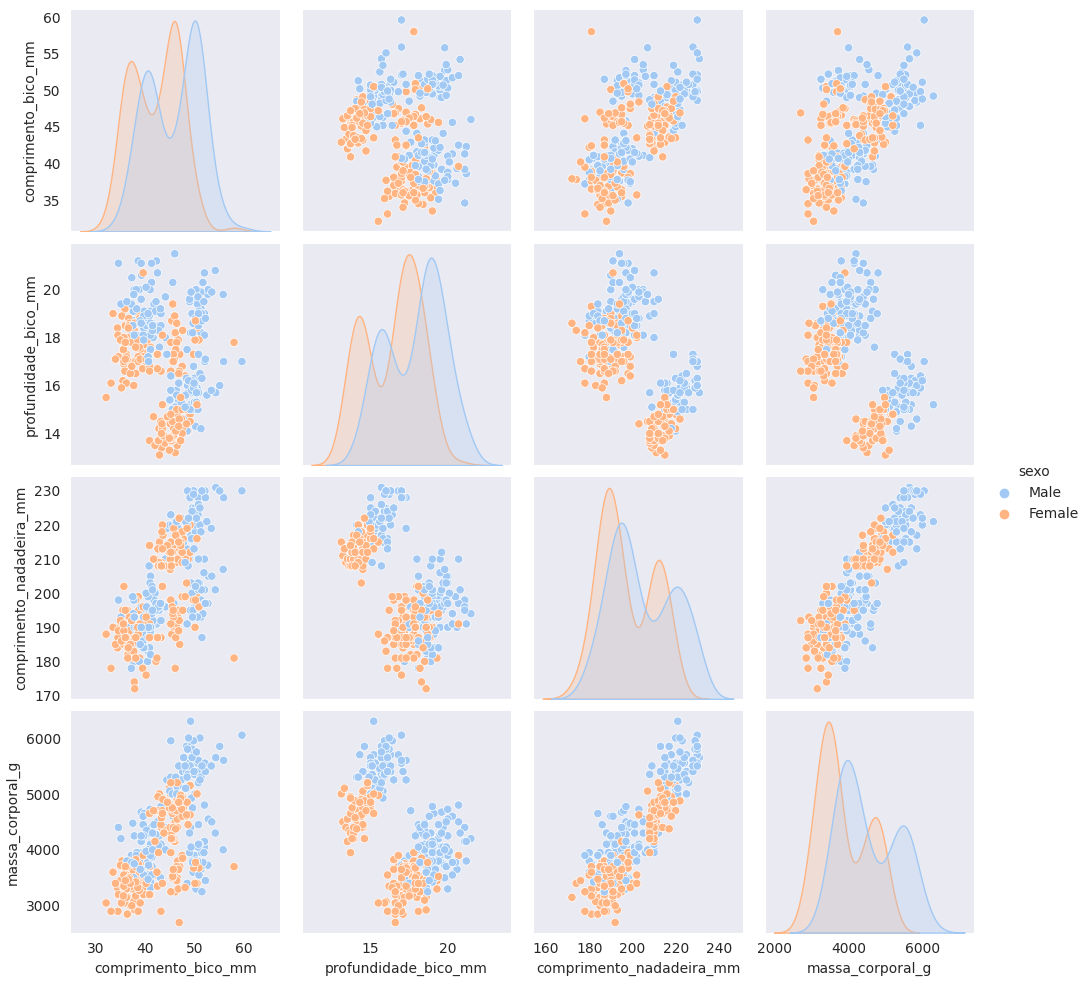

In [6]:
with sns.axes_style('dark'):

  grafico = sns.pairplot(data=penguim, hue="sexo", palette="pastel")

**Comentário:** 

Através dos gráficos, podemos observar as características de todas as espécies, por gráficos de dispersão. Podemos observar que:

- O comprimento do bico no sexo feminino exibe uma curva de distribuição ligeiramente diferente, com valores tendendo a serem maiores do que no sexo masculino.

- Alguns machos mostram uma tendência de aumentar de peso à medida que o comprimento da nadadeira aumenta, enquanto outros têm pesos menores, mesmo com nadadeiras maiores.

- O comprimento da nadadeira mostra uma correlação com o peso em ambos os sexos, sugerindo que ambas as variáveis têm influência semelhante sobre o peso, com impacto relativamente similar.

- Observa-se uma tendência em que as fêmeas com menor profundidade de bico tendem a apresentar pesos menores em comparação com os machos.

- Existe uma tendência de que quanto maior o comprimento do bico, mais pesados eles são, especialmente os machos.

- O comprimento da nadadeira e o comprimento do bico parece estar bem interligados, quanto maior o comprimento da nadadeira, maior é o do bico em ambos os sexos.

 - Atributos por espécie:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data

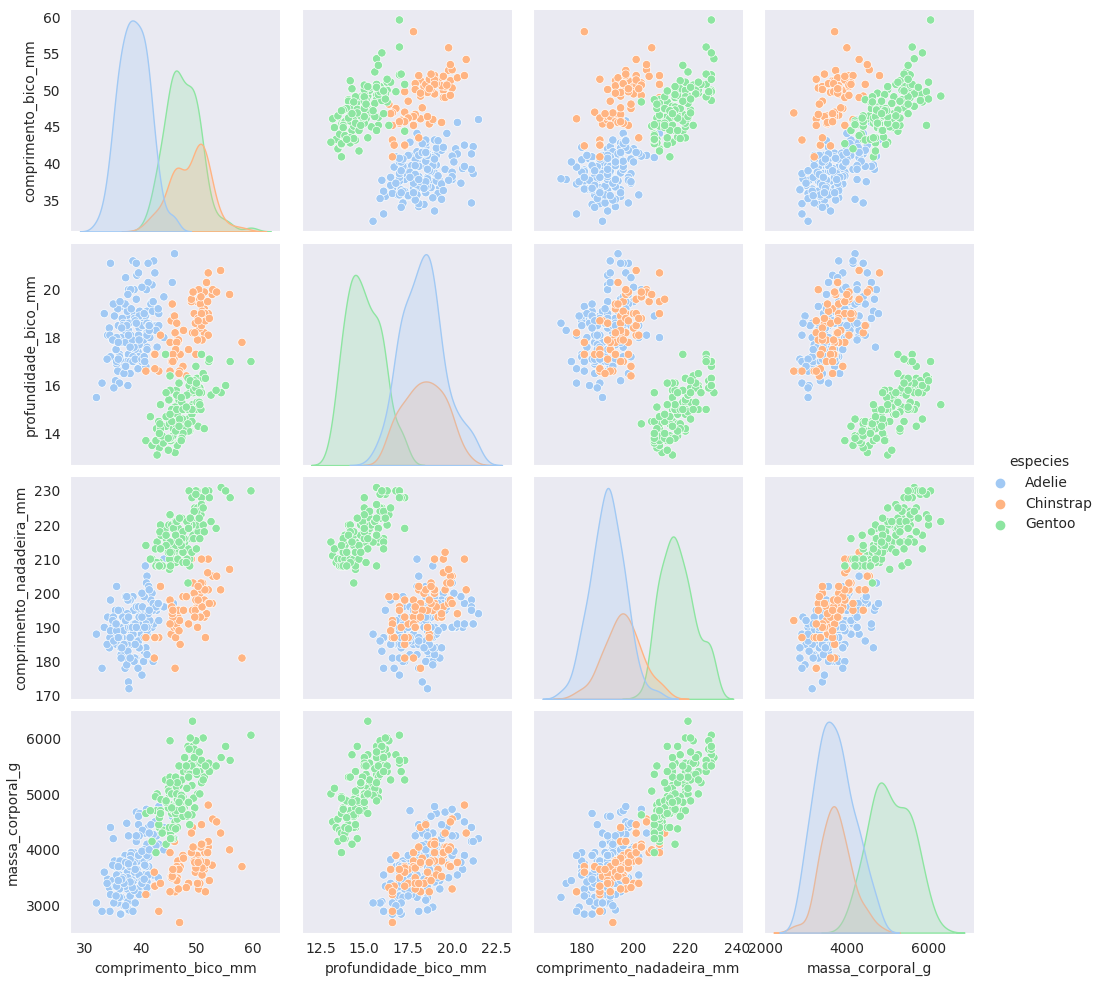

In [7]:
with sns.axes_style('dark'):

  grafico = sns.pairplot(data=penguim, hue="especies", palette="pastel")

**Comentário:** 

- O comprimento do bico da espécie Adelie é maior que nas demais, no entanto, em relação ao seu peso, não é a espécie mais pesada.

- Os pontos estão amplamente dispersos para cada espécie quando se trata do comprimento da nadadeira em relação ao comprimento do bico de cada uma. Observa-se que a espécie Gentoo é de longe a que apresenta maior comprimento em ambas as variáveis em comparação com as outras espécies.

- A profundidade do bico de Adelie e Chinstrap, em sua maioria, é maior do que a do Gentoo, no entanto, são as mais leves. A espécie Gentoo é mais pesada e não tem correlação com a profundidade do bico.

- Em relação ao comprimento da nadadeira e a profundidade do bico, é possível observar que a espécie Gentoo se destaca, mostrando uma forte ligação entre elas, e estão dispersas das demais espécies.

- Adelie é a espécie mais pesada.

- De modo geral, em quase todas as variáveis, a espécie Gentoo apresenta pontos amplamente dispersos em comparação com as espécies Adelie e Chinstrap, enquanto Adelie e Chinstrap têm uma correlação significativa entre as variáveis em comum.

 - Atributos por ilha:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data

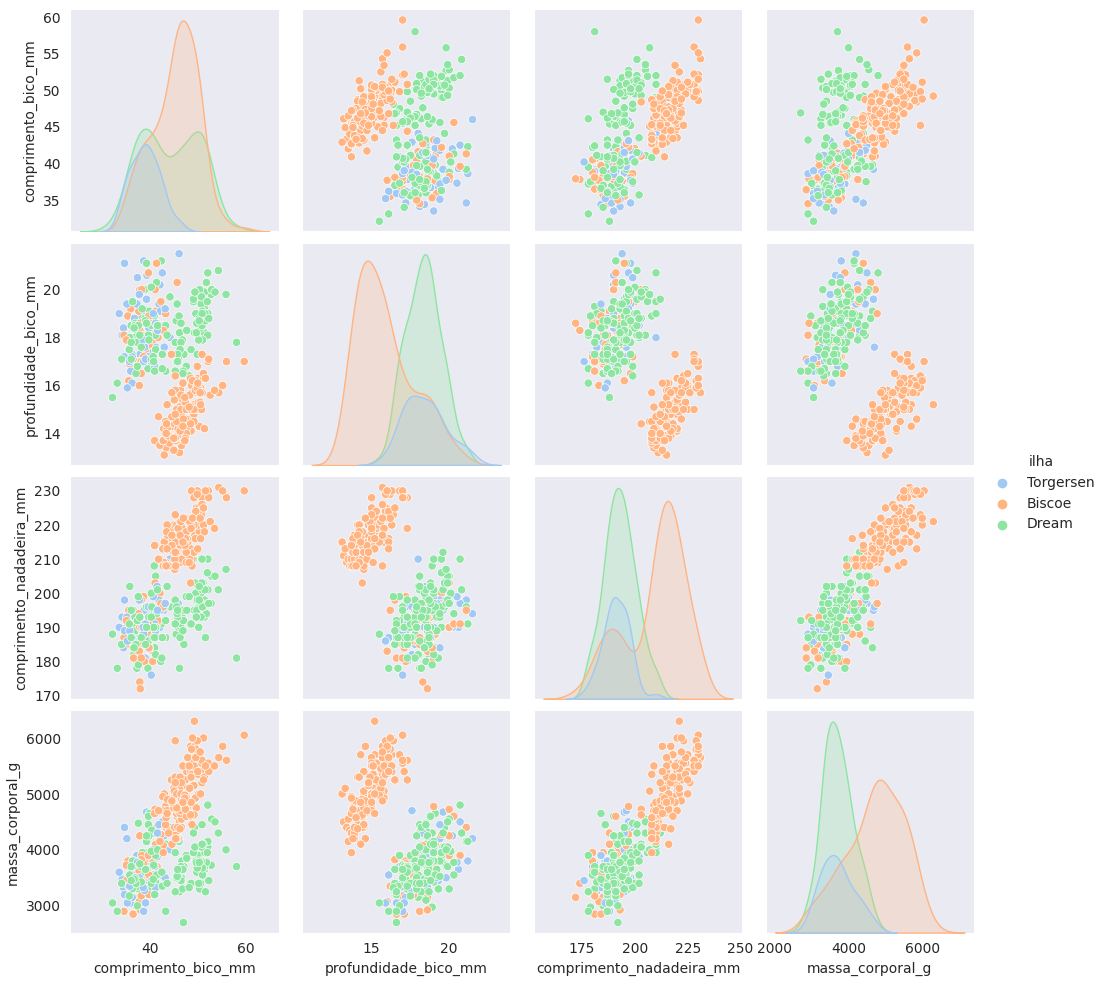

In [8]:
with sns.axes_style('dark'):

  grafico = sns.pairplot(data=penguim, hue="ilha", palette="pastel")

**Comentário:**

- A ilha Dream é o habitat dos pinguins mais pesados.

- Os pinguins com o maior comprimento da nadadeira tendem a ser os mais pesados e estão predominantemente localizados na ilha Biscoe.

- Os pinguins com os maiores comprimentos de bico também são encontrados principalmente na ilha Biscoe.

- Em sua maioria, os pinguins com os menores comprimentos de nadadeira estão na ilha Torgersen, enquanto os maiores estão localizados nas ilhas Dream e Biscoe.

- Na ilha Biscoe, alguns pinguins com a menor profundidade de bico têm o maior comprimento de nadadeira, embora haja casos em que tanto a profundidade quanto o comprimento estão significativamente abaixo da média.

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [9]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   especies                  344 non-null    object 
 1   ilha                      344 non-null    object 
 2   comprimento_bico_mm       342 non-null    float64
 3   profundidade_bico_mm      342 non-null    float64
 4   comprimento_nadadeira_mm  342 non-null    float64
 5   massa_corporal_g          342 non-null    float64
 6   sexo                      333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
penguim.isnull().sum()

especies                     0
ilha                         0
comprimento_bico_mm          2
profundidade_bico_mm         2
comprimento_nadadeira_mm     2
massa_corporal_g             2
sexo                        11
dtype: int64

In [11]:
penguim.dropna(inplace=True)

In [12]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   especies                  333 non-null    object 
 1   ilha                      333 non-null    object 
 2   comprimento_bico_mm       333 non-null    float64
 3   profundidade_bico_mm      333 non-null    float64
 4   comprimento_nadadeira_mm  333 non-null    float64
 5   massa_corporal_g          333 non-null    float64
 6   sexo                      333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


### **2.2. Variáveis numéricas** 

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [13]:
media = penguim["comprimento_bico_mm"].mean()
print(media)

desvio_padrao = penguim["comprimento_bico_mm"].std()
print(desvio_padrao)

43.99279279279279
5.468668342647559


In [14]:
# Fazendo o cálculo manualmente de uma variável para testar um método eficaz

penguim["comprimento_bico_mm"] = penguim["comprimento_bico_mm"].apply(lambda nota: (nota - media) / desvio_padrao)

In [15]:
penguim.head(10)

,especies,ilha,comprimento_bico_mm,profundidade_bico_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo
0,Adelie,Torgersen,-0.894695,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,-0.821552,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,-0.675264,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,-1.333559,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,-0.858123,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,-0.931267,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,-0.876409,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,-0.528976,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,-0.986125,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,-1.717565,21.1,198.0,4400.0,Male


Padronizando as variáveis numéricas com a classe 'StandardScaler'. 
 Essa classe realiza a padronização de forma automática, calculando a média e o desvio padrão de cada coluna e, em seguida, aplicando a transformação.

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
# Fazendo o teste na primeira variável numérica
scaler = StandardScaler()
scaler = scaler.fit(penguim[["comprimento_bico_mm"]])
penguim["comprimento_bico_mm_std"] = scaler.transform(penguim[["comprimento_bico_mm"]])

In [18]:
penguim.head()

,especies,ilha,comprimento_bico_mm,profundidade_bico_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo,comprimento_bico_mm_std
0,Adelie,Torgersen,-0.894695,18.7,181.0,3750.0,Male,-0.896042
1,Adelie,Torgersen,-0.821552,17.4,186.0,3800.0,Female,-0.822788
2,Adelie,Torgersen,-0.675264,18.0,195.0,3250.0,Female,-0.676280
4,Adelie,Torgersen,-1.333559,19.3,193.0,3450.0,Female,-1.335566
5,Adelie,Torgersen,-0.858123,20.6,190.0,3650.0,Male,-0.859415


In [19]:
# Inicializando o StandardScaler
scaler = StandardScaler()

# Ajustando o scaler às colunas desejadas
scaler = scaler.fit(penguim[["profundidade_bico_mm", "comprimento_nadadeira_mm"]])

# Transformando todas as colunas ao mesmo tempo
penguim[["profundidade_bico_mm_std", "comprimento_nadadeira_mm_std"]] = scaler.transform(penguim[["profundidade_bico_mm", "comprimento_nadadeira_mm"]])

Podemos perceber que padronizando manualmente na coluna **comprimento_bico_mm**, fazendo com o método StandardScaler, o valor chega muito próximo, o que facilita na transformação desses dados.


In [20]:
penguim.head(10)

,especies,ilha,comprimento_bico_mm,profundidade_bico_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo,comprimento_bico_mm_std,profundidade_bico_mm_std,comprimento_nadadeira_mm_std
0,Adelie,Torgersen,-0.894695,18.7,181.0,3750.0,Male,-0.896042,0.780732,-1.426752
1,Adelie,Torgersen,-0.821552,17.4,186.0,3800.0,Female,-0.822788,0.119584,-1.069474
2,Adelie,Torgersen,-0.675264,18.0,195.0,3250.0,Female,-0.676280,0.424729,-0.426373
4,Adelie,Torgersen,-1.333559,19.3,193.0,3450.0,Female,-1.335566,1.085877,-0.569284
5,Adelie,Torgersen,-0.858123,20.6,190.0,3650.0,Male,-0.859415,1.747026,-0.783651
6,Adelie,Torgersen,-0.931267,17.8,181.0,3625.0,Female,-0.932669,0.323014,-1.426752
7,Adelie,Torgersen,-0.876409,19.6,195.0,4675.0,Male,-0.877728,1.238450,-0.426373
12,Adelie,Torgersen,-0.528976,17.6,182.0,3200.0,Female,-0.529772,0.221299,-1.355296
13,Adelie,Torgersen,-0.986125,21.2,191.0,3800.0,Male,-0.987609,2.052171,-0.712196
14,Adelie,Torgersen,-1.717565,21.1,198.0,4400.0,Male,-1.720150,2.001313,-0.212006


### **2.3. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [21]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   especies                      333 non-null    object 
 1   ilha                          333 non-null    object 
 2   comprimento_bico_mm           333 non-null    float64
 3   profundidade_bico_mm          333 non-null    float64
 4   comprimento_nadadeira_mm      333 non-null    float64
 5   massa_corporal_g              333 non-null    float64
 6   sexo                          333 non-null    object 
 7   comprimento_bico_mm_std       333 non-null    float64
 8   profundidade_bico_mm_std      333 non-null    float64
 9   comprimento_nadadeira_mm_std  333 non-null    float64
dtypes: float64(7), object(3)
memory usage: 28.6+ KB


Codificação One-Hot – para variáveis categóricas nominais:

In [22]:
# Filtrando as 3 variáveis categóricas
esp = penguim["especies"].value_counts()
print(esp)
il = penguim["ilha"].value_counts()
print(il)
sex = penguim["sexo"].value_counts()
print(sex)

especies
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64
ilha
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64
sexo
Male      168
Female    165
Name: count, dtype: int64


In [23]:
# One Hot Encoding
penguim["especies_Adelie_nom"] = penguim["especies"].apply(lambda especies: 1 if especies == "Adelie" else 0)
penguim["especies_Gentoo_nom"] = penguim["especies"].apply(lambda especies: 1 if especies == "Gentoo" else 0)
penguim["especies_Chinstrap_nom"] = penguim["especies"].apply(lambda especies: 1 if especies == "Chinstrap" else 0)

penguim["ilha_Biscoe_nom"] = penguim["ilha"].apply(lambda ilha: 1 if ilha == "Biscoe" else 0)
penguim["ilha_Dream_nom"] = penguim["ilha"].apply(lambda ilha: 1 if ilha == "Dream" else 0)
penguim["ilha_Torgersen_nom"] = penguim["ilha"].apply(lambda ilha: 1 if ilha == "Torgersen" else 0)

penguim["sexo_M_nom"] = penguim["sexo"].apply(lambda sexo: 1 if sexo == "Male" else 0)
penguim["sexo_F_nom"] = penguim["sexo"].apply(lambda sexo: 1 if sexo == "Female" else 0)


In [24]:
penguim.head()

,especies,ilha,comprimento_bico_mm,profundidade_bico_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo,comprimento_bico_mm_std,profundidade_bico_mm_std,comprimento_nadadeira_mm_std,especies_Adelie_nom,especies_Gentoo_nom,especies_Chinstrap_nom,ilha_Biscoe_nom,ilha_Dream_nom,ilha_Torgersen_nom,sexo_M_nom,sexo_F_nom
0,Adelie,Torgersen,-0.894695,18.7,181.0,3750.0,Male,-0.896042,0.780732,-1.426752,1,0,0,0,0,1,1,0
1,Adelie,Torgersen,-0.821552,17.4,186.0,3800.0,Female,-0.822788,0.119584,-1.069474,1,0,0,0,0,1,0,1
2,Adelie,Torgersen,-0.675264,18.0,195.0,3250.0,Female,-0.676280,0.424729,-0.426373,1,0,0,0,0,1,0,1
4,Adelie,Torgersen,-1.333559,19.3,193.0,3450.0,Female,-1.335566,1.085877,-0.569284,1,0,0,0,0,1,0,1
5,Adelie,Torgersen,-0.858123,20.6,190.0,3650.0,Male,-0.859415,1.747026,-0.783651,1,0,0,0,0,1,1,0


### **2.4. Limpeza** 

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [25]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   especies                      333 non-null    object 
 1   ilha                          333 non-null    object 
 2   comprimento_bico_mm           333 non-null    float64
 3   profundidade_bico_mm          333 non-null    float64
 4   comprimento_nadadeira_mm      333 non-null    float64
 5   massa_corporal_g              333 non-null    float64
 6   sexo                          333 non-null    object 
 7   comprimento_bico_mm_std       333 non-null    float64
 8   profundidade_bico_mm_std      333 non-null    float64
 9   comprimento_nadadeira_mm_std  333 non-null    float64
 10  especies_Adelie_nom           333 non-null    int64  
 11  especies_Gentoo_nom           333 non-null    int64  
 12  especies_Chinstrap_nom        333 non-null    int64  
 13  ilha_Bisco

In [26]:
# Removendo as colunas originais
remocao_colunas = ["especies", "ilha", "sexo", "comprimento_bico_mm",
                   "profundidade_bico_mm", "comprimento_nadadeira_mm"]
penguim.drop(remocao_colunas, axis=1, inplace=True)


In [27]:
penguim.head()

,massa_corporal_g,comprimento_bico_mm_std,profundidade_bico_mm_std,comprimento_nadadeira_mm_std,especies_Adelie_nom,especies_Gentoo_nom,especies_Chinstrap_nom,ilha_Biscoe_nom,ilha_Dream_nom,ilha_Torgersen_nom,sexo_M_nom,sexo_F_nom
0,3750.0,-0.896042,0.780732,-1.426752,1,0,0,0,0,1,1,0
1,3800.0,-0.822788,0.119584,-1.069474,1,0,0,0,0,1,0,1
2,3250.0,-0.676280,0.424729,-0.426373,1,0,0,0,0,1,0,1
4,3450.0,-1.335566,1.085877,-0.569284,1,0,0,0,0,1,0,1
5,3650.0,-0.859415,1.747026,-0.783651,1,0,0,0,0,1,1,0


### **2.5. Treino/Teste** 

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

A idéia é prever o peso do penguin (**massa_corporal_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
# Deixando todas as variáveis (exceto a resposta)
predictors_train, predictors_test, target_train, target_test = train_test_split(
    penguim.drop(["massa_corporal_g"], axis=1), # Removendo a variável resposta
    penguim["massa_corporal_g"],
    test_size=0.33, # 33% dos dados serão para teste
    random_state=123
)

In [30]:
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(223, 11) (110, 11) (223,) (110,)


In [31]:
predictors_train.head()

,comprimento_bico_mm_std,profundidade_bico_mm_std,comprimento_nadadeira_mm_std,especies_Adelie_nom,especies_Gentoo_nom,especies_Chinstrap_nom,ilha_Biscoe_nom,ilha_Dream_nom,ilha_Torgersen_nom,sexo_M_nom,sexo_F_nom
84,-1.225685,0.323014,-0.712196,1,0,0,0,1,0,0,1
267,1.191698,-0.643279,1.717295,0,1,0,1,0,0,1,0
131,-0.163502,1.035020,-0.283462,1,0,0,0,0,1,1,0
67,-0.529772,0.984162,-0.926562,1,0,0,1,0,0,1,0
223,1.100130,-0.999282,1.217106,0,1,0,1,0,0,1,0


In [32]:
predictors_test.head()

,comprimento_bico_mm_std,profundidade_bico_mm_std,comprimento_nadadeira_mm_std,especies_Adelie_nom,especies_Gentoo_nom,especies_Chinstrap_nom,ilha_Biscoe_nom,ilha_Dream_nom,ilha_Torgersen_nom,sexo_M_nom,sexo_F_nom
111,0.294336,1.594453,-0.712196,1,0,0,1,0,0,1,0
158,0.385904,0.526444,-1.641118,0,0,1,0,1,0,0,1
288,-0.090248,-1.507858,1.360017,0,1,0,1,0,0,0,1
308,0.642293,-1.609573,0.788372,0,1,0,1,0,0,0,1
185,1.283265,0.831590,0.145272,0,0,1,0,1,0,1,0


In [33]:
target_train.head()

84     3350.0
267    5400.0
131    3500.0
67     4100.0
223    5700.0
Name: massa_corporal_g, dtype: float64

In [34]:
target_test.head()

111    4600.0
158    3250.0
288    4700.0
308    4875.0
185    4100.0
Name: massa_corporal_g, dtype: float64

## 3\. Modelagem 

### **3.1. Treino** 

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [35]:
modelo = LinearRegression()

In [36]:
modelo.fit(predictors_train, target_train)

LinearRegression()

In [37]:
modelo.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['comprimento_bico_mm_std', 'profundidade_bico_mm_std',
        'comprimento_nadadeira_mm_std', 'especies_Adelie_nom',
        'especies_Gentoo_nom', 'especies_Chinstrap_nom', 'ilha_Biscoe_nom',
        'ilha_Dream_nom', 'ilha_Torgersen_nom', 'sexo_M_nom', 'sexo_F_nom'],
       dtype=object),
 'n_features_in_': 11,
 'coef_': array([ 132.71027244,  155.87594085,  213.47203802, -225.77619674,
         764.12100869, -538.34481195,   22.02748221,   34.81383969,
         -56.8413219 ,  185.05460499, -185.05460499]),
 'rank_': 8,
 'singular_': array([2.40220491e+01, 1.54339226e+01, 1.09602430e+01, 6.05304901e+00,
        5.75356295e+00, 5.24060206e+00, 3.24532727e+00, 2.08318407e+00,
        3.11826382e-15, 1.36758594e-15, 1.02354716e-15]),
 'intercept_': 4115.073304511307}

In [38]:
a = modelo.coef_
print(a)

[ 132.71027244  155.87594085  213.47203802 -225.77619674  764.12100869
 -538.34481195   22.02748221   34.81383969  -56.8413219   185.05460499
 -185.05460499]


In [39]:
b = modelo.intercept_
print(b)

4115.073304511307


In [40]:
penguim.head(1)

,massa_corporal_g,comprimento_bico_mm_std,profundidade_bico_mm_std,comprimento_nadadeira_mm_std,especies_Adelie_nom,especies_Gentoo_nom,especies_Chinstrap_nom,ilha_Biscoe_nom,ilha_Dream_nom,ilha_Torgersen_nom,sexo_M_nom,sexo_F_nom
0,3750.0,-0.896042,0.780732,-1.426752,1,0,0,0,0,1,1,0


### **3.2. Avaliação** 

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [41]:
target_predicted = modelo.predict(predictors_test)

In [42]:
target_predicted[0:5]

array([4231.9436047 , 3209.42821614, 4759.47722881, 4718.80772847,
       4127.5356665 ])

In [43]:
target_predicted.shape

(110,)

In [44]:
target_test[0:5]

111    4600.0
158    3250.0
288    4700.0
308    4875.0
185    4100.0
Name: massa_corporal_g, dtype: float64

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

295.8646687275044


In [47]:
teste_penguim = pd.concat([predictors_test, pd.DataFrame(target_test, columns=["massa_corporal_g"])], axis=1).reset_index(drop=True)
teste_penguim["predicted"] = False

In [48]:
teste_penguim.head()

,comprimento_bico_mm_std,profundidade_bico_mm_std,comprimento_nadadeira_mm_std,especies_Adelie_nom,especies_Gentoo_nom,especies_Chinstrap_nom,ilha_Biscoe_nom,ilha_Dream_nom,ilha_Torgersen_nom,sexo_M_nom,sexo_F_nom,massa_corporal_g,predicted
0,0.294336,1.594453,-0.712196,1,0,0,1,0,0,1,0,4600.0,False
1,0.385904,0.526444,-1.641118,0,0,1,0,1,0,0,1,3250.0,False
2,-0.090248,-1.507858,1.360017,0,1,0,1,0,0,0,1,4700.0,False
3,0.642293,-1.609573,0.788372,0,1,0,1,0,0,0,1,4875.0,False
4,1.283265,0.831590,0.145272,0,0,1,0,1,0,1,0,4100.0,False


In [49]:
prediction_penguim = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_test, columns=["massa_corporal_g"])], axis=1).reset_index(drop=True)
prediction_penguim["predicted"] = True

In [50]:
prediction_penguim.tail()

,comprimento_bico_mm_std,profundidade_bico_mm_std,comprimento_nadadeira_mm_std,especies_Adelie_nom,especies_Gentoo_nom,especies_Chinstrap_nom,ilha_Biscoe_nom,ilha_Dream_nom,ilha_Torgersen_nom,sexo_M_nom,sexo_F_nom,massa_corporal_g,predicted
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4550.0,True
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5050.0,True
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4900.0,True
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4625.0,True
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3700.0,True


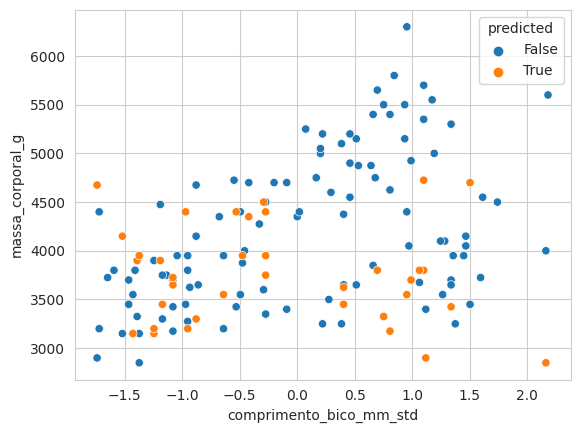

In [51]:
# Gerando o gráfico dos valores originais e os valores preditos

prediction = pd.concat([teste_penguim, prediction_penguim]).reset_index(drop=True)

with sns.axes_style("whitegrid"):
  sns.scatterplot(data=prediction, x="comprimento_bico_mm_std", y="massa_corporal_g", hue="predicted")


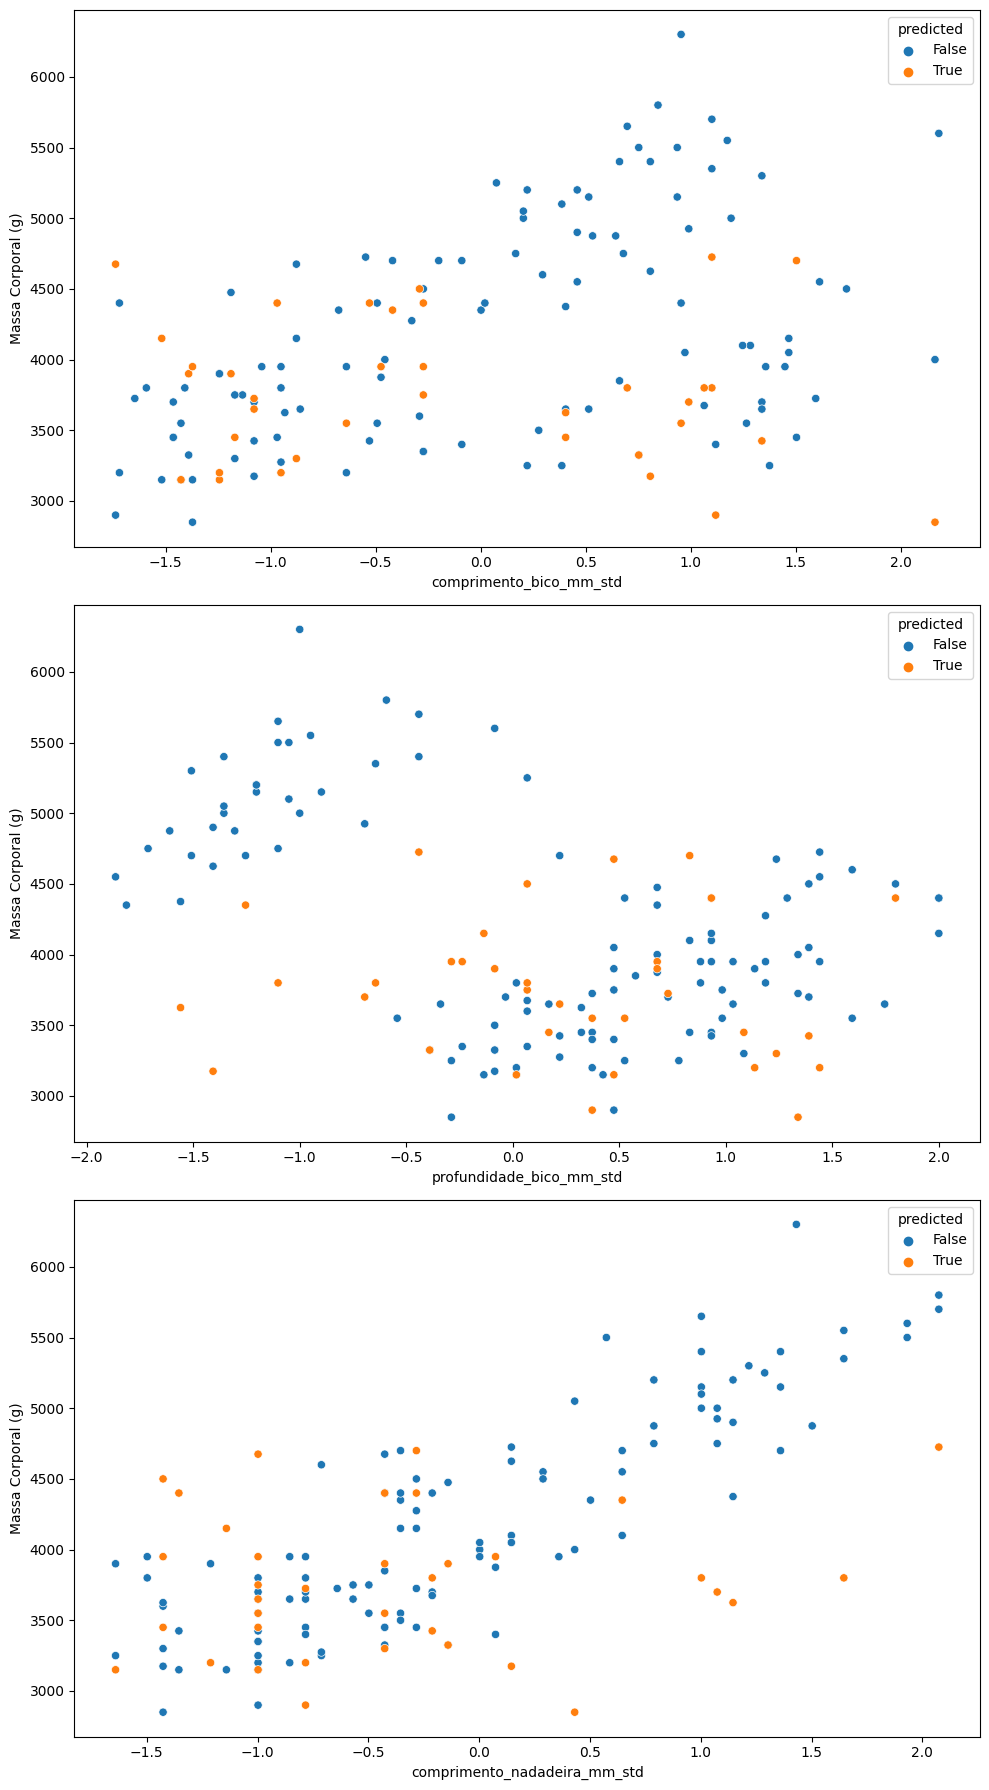

In [52]:
predictor_vars = ["comprimento_bico_mm_std", "profundidade_bico_mm_std", "comprimento_nadadeira_mm_std"]

plt.figure(figsize=(10, 18))

# Criar um scatterplot para cada variável preditiva
for i, var in enumerate(predictor_vars, 1):
    plt.subplot(len(predictor_vars), 1, i)
    sns.scatterplot(x=var, y="massa_corporal_g", data=prediction, hue="predicted")
    plt.xlabel(var)
    plt.ylabel("Massa Corporal (g)")

plt.tight_layout()
plt.show()

## 4\. Predição  

### **4.1. Novo penguim** 

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [53]:
# Gerando um DataFrame das novas características
peso_penguim = pd.DataFrame({
    "species": "Adelie",
    "island": "Biscoe",
    "bill_length_mm": [38.2],
    "bill_depth_mm": [18.1],
    "flipper_length_mm": [185.0],
    "sex": "Male",
})

In [54]:
peso_penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
0,Adelie,Biscoe,38.2,18.1,185.0,Male


In [55]:
# Aplicando o One Hot Encoding das novas características nas colunas categóricas
peso_penguim["especie_Adelie_nom"] = peso_penguim["species"].apply(lambda species: 1 if species == "Adelie" else 0)
peso_penguim["ilha_Biscoe_nom"] = peso_penguim["island"].apply(lambda island: 1 if island == "Biscoe" else 0)
peso_penguim["sexo_M_nom"] = peso_penguim["sex"].apply(lambda sex: 1 if sex == "Male" else 0)

In [56]:
peso_penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex,especie_Adelie_nom,ilha_Biscoe_nom,sexo_M_nom
0,Adelie,Biscoe,38.2,18.1,185.0,Male,1,1,1


In [57]:
# Removendo as colunas categóricas originais
remocao_colunas_peso_penguim = ["species", "island", "sex"]
peso_penguim.drop(remocao_colunas_peso_penguim, axis=1, inplace=True)

In [58]:
peso_penguim.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,especie_Adelie_nom,ilha_Biscoe_nom,sexo_M_nom
0,38.2,18.1,185.0,1,1,1


In [59]:
# Traduzindo as colunas
peso_penguim.columns = ["comprimento_bico_mm", "profundidade_bico_mm",
                   "comprimento_nadadeira_mm", "especie_Adelie_nom", "ilha_Biscoe_nom", "sexo_M_nom"]
peso_penguim.head()

,comprimento_bico_mm,profundidade_bico_mm,comprimento_nadadeira_mm,especie_Adelie_nom,ilha_Biscoe_nom,sexo_M_nom
0,38.2,18.1,185.0,1,1,1


In [60]:
# Obtendo apenas as colunas numéricas do DataFrame
colunas_numericas = penguim.select_dtypes(include=["number"])

# Calculando a média e o desvio padrão de cada coluna numérica usando um loop
medias = {}
desvios_padrao = {}

for coluna in colunas_numericas:
    medias[coluna] = penguim[coluna].mean()
    desvios_padrao[coluna] = penguim[coluna].std()

# Exibindo os resultados
print("Médias das colunas:")
for coluna, media in medias.items():
    print(f"{coluna}: {media}")

print("\nDesvios padrão das colunas:")
for coluna, desvio_padrao in desvios_padrao.items():
    print(f"{coluna}: {desvio_padrao}")

Médias das colunas:
massa_corporal_g: 4207.057057057057
comprimento_bico_mm_std: 0.0
profundidade_bico_mm_std: 6.40128590774865e-16
comprimento_nadadeira_mm_std: 2.13376196924955e-16
especies_Adelie_nom: 0.43843843843843844
especies_Gentoo_nom: 0.35735735735735735
especies_Chinstrap_nom: 0.2042042042042042
ilha_Biscoe_nom: 0.4894894894894895
ilha_Dream_nom: 0.36936936936936937
ilha_Torgersen_nom: 0.14114114114114115
sexo_M_nom: 0.5045045045045045
sexo_F_nom: 0.4954954954954955

Desvios padrão das colunas:
massa_corporal_g: 805.2158019428965
comprimento_bico_mm_std: 1.0015048917468008
profundidade_bico_mm_std: 1.0015048917468008
comprimento_nadadeira_mm_std: 1.0015048917468008
especies_Adelie_nom: 0.49694242226656055
especies_Gentoo_nom: 0.47994249929961325
especies_Chinstrap_nom: 0.40372554987370524
ilha_Biscoe_nom: 0.5006417965706956
ilha_Dream_nom: 0.48336037457526543
ilha_Torgersen_nom: 0.34869103926334166
sexo_M_nom: 0.5007321243651286
sexo_F_nom: 0.5007321243651286


---